### **Percistance**
- Store the `State` into __RAM__
- Store the `State` into __Database__

In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
# import operator
from typing import TypedDict, Annotated, List
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage
from langchain_ollama import ChatOllama


In [2]:
# State
class ChatState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]


In [3]:
model = ChatOllama(
    model="qwen2.5:0.5b",
    temperature=0.3
)

In [4]:
def chat_node(state: ChatState):
    message = state['messages']
    response = model.invoke(message)
    return {'messages': [response]}

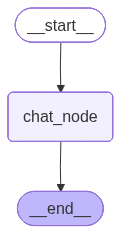

In [5]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# Node
graph.add_node('chat_node', chat_node)

# Edge
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# Compile
workflow = graph.compile(checkpointer=checkpointer)
workflow


In [6]:
thread_id = '1'

while True:
    user_message = input("Human: ")
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        print(response)
        break

    config = {'configurable': {'thread_id': thread_id}}
    response = workflow.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    print("Bot: ", response['messages'][-1].content)
    print()


Human:  Hi


Bot:  Hello! How can I assist you today?



Human:  what is the capital of India?


Bot:  The capital of India is New Delhi.



Human:  who is PM of it?


Bot:  As an AI language model, I don't have real-time information about current events or specific political figures. The Prime Minister of India is Narendra Modi. He served as the Prime Minister from 2014 to 2019 and again from 2022 to 2027.



Human:  How many state in it?


Bot:  As an AI language model, I don't have real-time information about current events or specific political figures. The number of states in India is 34. These are the 34 states and the Union Territories that make up the country. Each state has its own government and laws, and they can be further divided into districts, which are themselves divided into towns and villages.



Human:  My name is Arjun.


Bot:  Hello! How can I assist you today?



Human:  what is the my name?


Bot:  Your name is Arjun.



Human:  quit


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='b1546bcd-6c21-4fa0-adb2-0c9e8e71aab8'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'qwen2.5:0.5b', 'created_at': '2026-01-08T11:31:13.4362951Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1624168300, 'load_duration': 1392061200, 'prompt_eval_count': 30, 'prompt_eval_duration': 108174200, 'eval_count': 10, 'eval_duration': 112502400, 'logprobs': None, 'model_name': 'qwen2.5:0.5b', 'model_provider': 'ollama'}, id='lc_run--019b9d5f-fb41-7952-9201-dc5fa6cddd45-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40}), HumanMessage(content='what is the capital of India?', additional_kwargs={}, response_metadata={}, id='e1ad433f-0dce-4d2c-a15e-7abcc1b24386'), AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'model': 'qwen2

In [9]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='b1546bcd-6c21-4fa0-adb2-0c9e8e71aab8'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'qwen2.5:0.5b', 'created_at': '2026-01-08T11:31:13.4362951Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1624168300, 'load_duration': 1392061200, 'prompt_eval_count': 30, 'prompt_eval_duration': 108174200, 'eval_count': 10, 'eval_duration': 112502400, 'logprobs': None, 'model_name': 'qwen2.5:0.5b', 'model_provider': 'ollama'}, id='lc_run--019b9d5f-fb41-7952-9201-dc5fa6cddd45-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40}), HumanMessage(content='what is the capital of India?', additional_kwargs={}, response_metadata={}, id='e1ad433f-0dce-4d2c-a15e-7abcc1b24386'), AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_meta